In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

(60000, 784)



Starting a Restricted Boltzmann Machine with 500 units..

Number of hidden units: 500


100%|██████████| 3000/3000 [00:22<00:00, 130.65it/s]


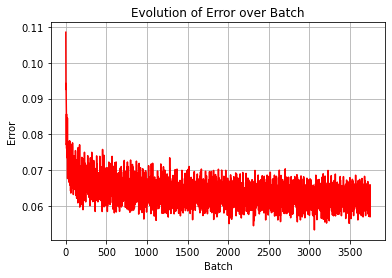

In [4]:
ITERATIONS = 25
''' restricted boltzmann machine with 500 units'''
print("\nStarting a Restricted Boltzmann Machine with 500 units..")
#
 # Iterating over the epochs
averages_loss = []
mean_averages_loss = [] 
nb_hidden_units = 500
print("\nNumber of hidden units: " + str(nb_hidden_units))
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                ndim_hidden=nb_hidden_units,
                                is_bottom=False,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=20
                                )
averages_loss_500_units, error_500 = rbm.cd1(visible_trainset=train_imgs, n_iterations=ITERATIONS, plotting=PLOTTING)


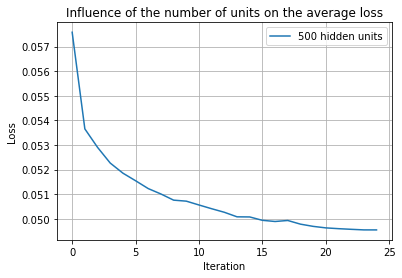

In [5]:
if PLOTTING:
    #plt.plot(np.arange(len(averages_loss_200_units)), abs(np.ones(np.shape(averages_loss_200_units))-averages_loss_200_units), label=str(200) + " hidden units")
    plt.plot(np.arange(len(averages_loss_500_units)), averages_loss_500_units, label=str(500) + " hidden units")
    plt.xlabel("Iteration")
    plt.ylabel("Loss Rate")
    plt.title("Influence of the number of units on the average loss per iteration")
    plt.grid()
    plt.legend()
    plt.show()


Starting a Restricted Boltzmann Machine with 200 units..

Number of hidden units: 200


100%|██████████| 3000/3000 [00:13<00:00, 223.33it/s]


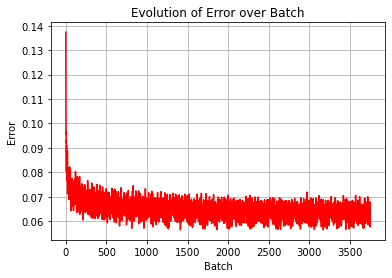

In [6]:
ITERATIONS = 25
''' restricted boltzmann machine with 200 units'''
print("\nStarting a Restricted Boltzmann Machine with 200 units..")
#
 # Iterating over the epochs
averages_loss_200 = []
nb_hidden_units = 200
print("\nNumber of hidden units: " + str(nb_hidden_units))
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                ndim_hidden=nb_hidden_units,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=20
                                )
averages_loss_200_units, error_200 = rbm.cd1(visible_trainset=train_imgs, n_iterations=ITERATIONS, plotting=PLOTTING)

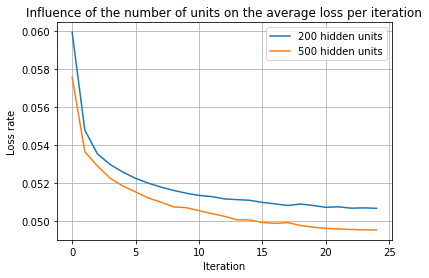

In [7]:
if PLOTTING:
    plt.plot(np.arange(len(averages_loss_200_units)), averages_loss_200_units, label=str(200) + " hidden units")
    plt.plot(np.arange(len(averages_loss_500_units)), averages_loss_500_units, label=str(500) + " hidden units")
    plt.xlabel("Iteration")
    plt.ylabel("Loss rate")
    plt.title("Influence of the number of units on the average loss per iteration")
    plt.grid()
    plt.legend()
    plt.show()

In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

print("Recognition with the train set")
error_train = dbn.recognize(train_imgs, train_lbls)
print("Recognition with the test set")
error_test = dbn.recognize(test_imgs, test_lbls)


(60000, 784)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm
Recognition with the train set
accuracy = 90.72%
Recognition with the test set
accuracy = 90.87%


Text(0.5, 1.0, 'Accuracy on train and test set')

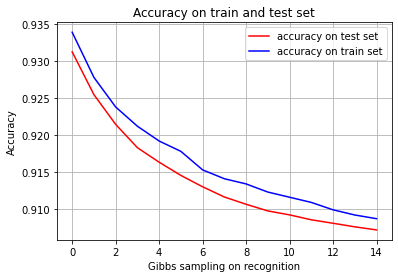

In [3]:
plt.figure()
plt.plot(np.arange(len(error_train)),error_train, color='red', label="accuracy on test set")
plt.plot(np.arange(len(error_test)),error_test, color='blue', label="accuracy on train set")
plt.legend()
plt.grid()
plt.xlabel("Gibbs sampling on recognition")
plt.ylabel("Accuracy")
plt.title("Accuracy on train and test set")


(60000, 784)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


100%|██████████| 500/500 [00:00<00:00, 683.02it/s]


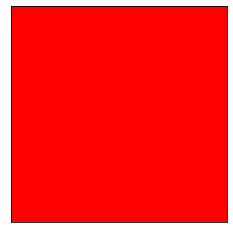

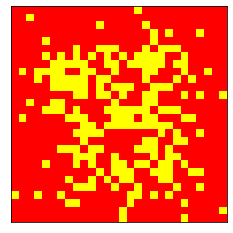

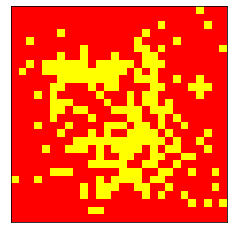

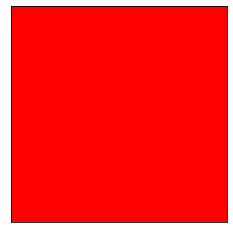

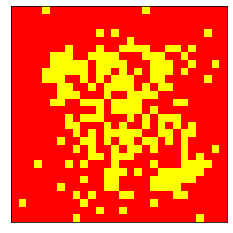

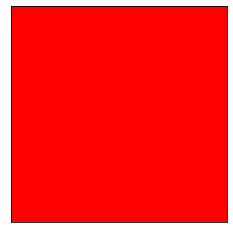

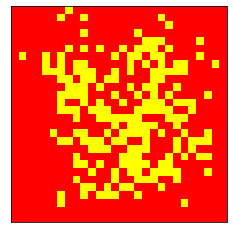

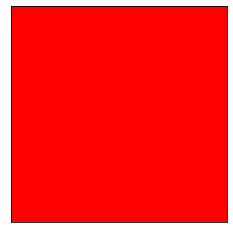

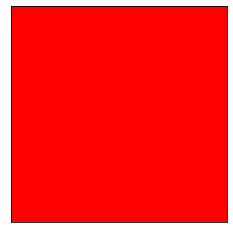

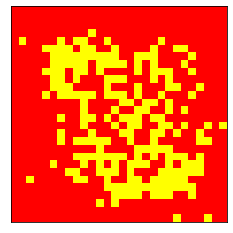

In [2]:
# GENERATION : Phase de test uniquement
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(25)
ITERATIONS = 10
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )

''' greedy layer-wise training '''
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)

id_random = np.random.randint(0,np.shape(train_imgs)[1])
vis_help = train_imgs[id_random,:]
for digit in range(10):
     digit_1hot = np.zeros(shape=(1, 10))
     digit_1hot[0, digit] = 1
     dbn.generate(digit_1hot, name="rbms")



In [ ]:


from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

print("Recognition with the train set")
dbn.recognize_label(train_imgs, train_lbls)
print("Recognition with the test set")
dbn.recognize(test_imgs, test_lbls)

(60000, 784)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


100%|██████████| 2000/2000 [00:02<00:00, 909.01it/s]


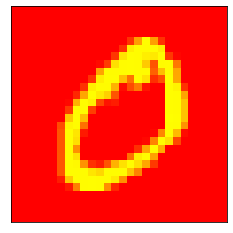

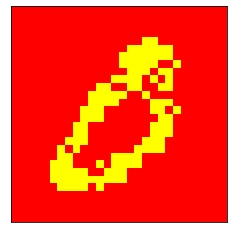

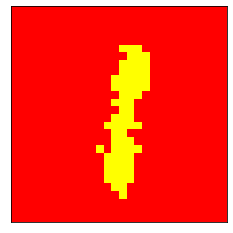

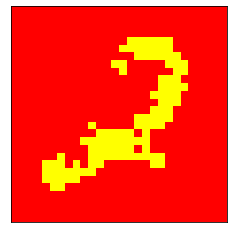

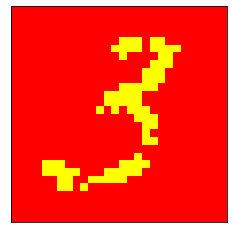

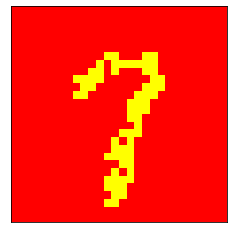

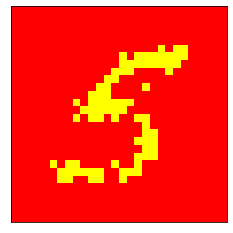

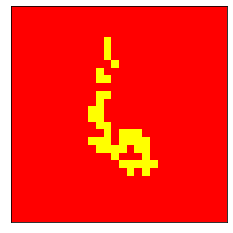

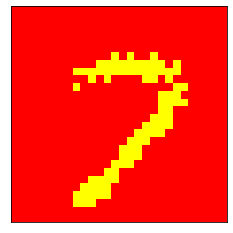

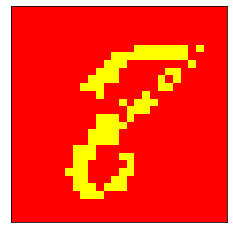

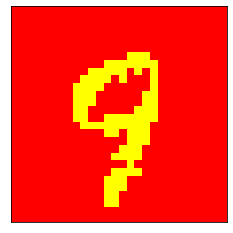

In [1]:


from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

image_0 = train_imgs[1,:]


fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image_0.reshape(image_size), cmap="autumn", vmin=0, vmax=1, animated=True,
                                      interpolation=None)

for digit in range(10):
     digit_1hot = np.zeros(shape=(1, 10))
     digit_1hot[0, digit] = 1
     dbn.generate(digit_1hot, name="rbms", vis_help = image_0, param=True)

In [ ]:
# # TASK 4.3
# ''' fine-tune wake-sleep training '''

# dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)

# dbn.recognize(train_imgs, train_lbls)

# dbn.recognize(test_imgs, test_lbls)
# #
# # for digit in range(10):
# #     digit_1hot = np.zeros(shape=(1, 10))
# #     digit_1hot[0, digit] = 1
# #     dbn.generate(digit_1hot, name="dbn")

In [4]:
image_0 = train_imgs[1,:]
image_2 = train_imgs[2,:]
image_init = np.concatenate(image_0[:,len(image_0)/2],image_2[:,len(image_2)/2], axis=0)


fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image_cool.reshape(image_size), cmap="autumn", vmin=0, vmax=1, animated=True,
                                      interpolation=None)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
image_0 = np.array(train_imgs[1,:])
image_2 = train_imgs[2,:]
print(np.shape(image_0[:len(image_0)/2]))

TypeError: slice indices must be integers or None or have an __index__ method